#### Final Proposal EDF 6938: Natural Langauge Processing

### Explore academic research topics about information literacy using LDA modeling
> #### Author: Xiaoman Wang
> #### Date: 12/6/2022
> #### Email: xiaoman@ufl.edu


#### 1. Introduction 

> The term of Information Literacy (IL) was first coined by Zurkowski in 1974. The concept and definition of IL have been evolved and ex-panded overtime for the past half century. The de-velopment of technology has played an important role in this process. The way information being created, evaluated, and disseminated has been change all the time, so does the research about in-formation literacy. Although traditional systematic review can provide important insight regarding the research trends, such studies usually can only fo-cus on one aspect of the area since only limited number of literatures can be reviewed manually in a single study. The maturity of Natural Language Processing (NLP) makes it possible for researchers to analyze large amount of text data to explore the underlying topics. The current study aims to take the advantage of NLP techniques to examine the abstracts of information literacy related journal articles published during the past decade to identi-fy the topics and trends of the research within this area.  




#### 2. Related Work 

> **Literature Review**


> Scholars have been exploring the trends of information literacy research using many different ways.  A common method that was adopted to studty the trends in the field of information literacy is bebliometric research (Nazim & Ahmad, 2007; Park & Kim, 2011; Pinto et al., 2013; Tallolli & Mulla, 2016; Ali et al., 2020; Islam et al., 2022). For example, Shaheen et al. (2017) condcuted a bibliometric study using abstract and citation information collected from the Sxopus database to exaplore the scholarly communiucation trend in the field of information literacy from  2003  to  2012. Most of such studies focus on the pobulication information, i.e., publication years, authors, countries, etc. There are also some studies explore the trends from the keywords of published jorunal articles. Pinto et al. (2020) examined the thematic evoluition of research realted to mobile information literacy from 2006 to 2019 by analyzing the keywords of publications collected from 5 databases. They identified six clusters of themes. To explore the research trends, abstracts could potentially be a good information source for us since they usually summarize the main content of the studies. The technique of Natual Language Plrocessing have been used as a powerful tool to analyze text data from research article abstracts. From example, Kuang et al. (2022) analyzed 3283 abstracts to extract research themes in the field of social sports and sports science. Little study has been found that using NLP to explore the research the trends and topics in the field of inforamtion literacy. 


> This study aims to answer the following research question: 
What are the main topics that have been studied regarding information literacy from 2012 to 2022? 





#### 3. Methods 

> To explore the underlying topics of the ab-stracts, we will analyze the abstracts using the La-tent Dirichlet Allocation (LDA) topic modeling method. LDA is one of the most commonly used topic modeling method, and its basic assumption is that each document, in this case each abstract, is represented as random mixtures over latent topics, where a topic is characterized by a distribution over words (Jelodar et al., 2019). The unit of anal-ysis for the current study would be each of the ab-stract.
3.1	Data or Data collection 
One of the most important educational re-search databases is EBSCO. We used the search string “information literacy” to locate articles that have it either in the title or abstract. All of the ex-tracted articles were stored in Zotero. After remov-ing duplicates, we have in total 3,474 journal arti-cles included in this study. 107 entries have missing data and have been removed from the current study. 3367 abstracts were included in the analysis. The data features we selected including:
> •	Publication Year
> •	Authors
> •	Abstract
> •	Publication title, i.e., journal titles

>**Data preprocessing** 
> All the extracted abstracts data were saved in a spreadsheet and then preprocessed in Python. Text data was first cleaned by finishing the process of lowercasing all texts, removing puctuations, replacing abbreviated forms and removing stopwords. Besides this standardized process, some other replacements were conducted. Information Literacy as a term were replaced with information_literacy as one word. The abbreviation of information literacy, IL, was also frequently used, so it was replaced by information_literacy. By the end of each abstract, there was note of *abstract from author*, which was then removed from the data as well. 
> After the data was cleaned, the texts were then tolenized, stemmed and lemmatized to prepare for the next step anaylsis. To better capture meaningful phrases besides single words, we then create bigram and trigram phrases. For example, the words *past decade *were changed into a bigram phrase *past_decade*. 

> **LDA Modeling** 
> The preprpcess text data served as the corpus for the LDA modeling analysis. Using the package of Gensim, miltiple models were generated and evaluated. For the curretly stage, we tried topic number from 3 to 15. We then evaluated the models from 3 aspects: coherence, visualization and perplexity. 
> We first calulate the coherece score for each model and identify the models with the top scores. Such models were the candidates for the next round of evaluation. We then examine the visualizaiton and perplexity score of these candidates. 



#### 4. Analysis Demonstration 

##### 4.1. Dependencies 

In [ ]:
# Import all the library that is necessary for your analysis 
import numpy as np
import pandas as pd 
import nltk 
nltk.download(['punkt', 'wordnet', 'omw-1.4'])

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
## Gensim
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel# spaCy for preprocessing
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
import spacy# Plotting tools

#############################################################

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##### 4.2. Code

In [ ]:
#### Your code for the analysis will be provided here 
# Text normalization 
class text_normalize():
    
    def import_data(self, dataset=1):
        self.dataset = dataset
        self.data = []
        self.author_year = []
        filename = 'Data.xlsx'
        data = pd.read_excel(filename)
        self.data  = data[data['dataset']==self.dataset].abstract.values 
        self.author_year = data[data['dataset']==self.dataset].author_year.values 
       
        return [' '.join(i) for i in self.data], pd.DataFrame(list(zip(self.data, self.author_year)), columns=['abstract', 'author_year'])
    
    def cleaning(self, string):
        import re
        string  = string.lower() # step 1. lowercase

        punc = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' # step 2. remove punctuations 
        string  = string.strip(punc) 
        string  = re.sub(r'[^\w\s]', '', string)

        string  = string.replace("can't", 'cannot') # step 3. replace abbreviated forms 
        string = string.replace("n't", ' not')
        string  = string.replace("'ll", ' will')
        string  = string.replace("'m", ' am')
        string = string.replace("he's", "he is")
        string = string.replace("it's", 'it is')
        string = string.replace("'re", " are")
        string = string.replace("<","")
        string = string.replace(">","")
        string = string.replace("information literacy","information_literacy")
        #string = string.replace("information","")
        #string = string.replace("study","")
        #string = string.replace("research","")
        #string = string.replace("library","")
        #string = string.replace("librarian","")
        #string = string.replace("librarians","")
        string = string.replace(" il "," information_literacy ")
        #string = string.replace("student","")
        #string = string.replace("students","")
        string = string.replace("abstract from author","")
        
        return re.sub(r"\d+", "", string) # step 4. replace all the numbers to <DIGIT>

    def sent_tokenize(self, string):
        import nltk
        return nltk.sent_tokenize(string)
    
    def tokenize(self, string):
        import nltk
        return nltk.word_tokenize(string)

    
    def stemming(self, tokens):
        import nltk
        stemmer = nltk.stem.PorterStemmer()
        return [stemmer.stem(token) for token in tokens]
    
    def lemmatize(self, tokens):
        import nltk
        lemmatizer = nltk.stem.WordNetLemmatizer()
        return [lemmatizer.lemmatize(token) for token in tokens]
    

    def preprocess(self, dataset=1):
        _, self.df = self.import_data(dataset=dataset)
        self.df["clean_abstract"] = self.df["abstract"].apply(self.cleaning) #cleaning applied to the abstract column 
        self.df['tokens'] = self.df.clean_abstract.apply(self.tokenize) #tokenization applied to the cleaned abstract 
        self.df['sentences'] = self.df.clean_abstract.apply(self.sent_tokenize)
        self.df['stem'] = self.df.tokens.apply(self.stemming)
        self.df['lemma'] = self.df.tokens.apply(self.lemmatize)

        return self.df 

normalizer = text_normalize() # call the text_normalize function and name it normalizer

df = normalizer.preprocess(1)

def remove_stopwords(txt_tokennized):
    txt_clean = [word for word in txt_tokennized if word not in stop_words]
    return txt_clean

df['normalized'] = df['lemma'].apply(lambda x: remove_stopwords(x))

####################################################

In [ ]:
df

,abstract,author_year,clean_abstract,tokens,sentences,stem,lemma,normalized
0,"Over the past few decades, the demand for acad...","Kirker, Maoria J. (2022)",over the past few decades the demand for acade...,"[over, the, past, few, decades, the, demand, f...",[over the past few decades the demand for acad...,"[over, the, past, few, decad, the, demand, for...","[over, the, past, few, decade, the, demand, fo...","[past, decade, demand, academic, librarian, te..."
1,"Time is a site of power, one that enacts parti...","Nicholson, Karen P. (2019)",time is a site of power one that enacts partic...,"[time, is, a, site, of, power, one, that, enac...",[time is a site of power one that enacts parti...,"[time, is, a, site, of, power, one, that, enac...","[time, is, a, site, of, power, one, that, enac...","[time, site, power, one, enacts, particular, s..."
2,This article argues for the incorporation of l...,"Willms, Nicole; O'Brien-Jenks, Kelly (2021)",this article argues for the incorporation of l...,"[this, article, argues, for, the, incorporatio...",[this article argues for the incorporation of ...,"[thi, articl, argu, for, the, incorpor, of, li...","[this, article, argues, for, the, incorporatio...","[article, argues, incorporation, library, inst..."
3,Purpose The workplace is a context of increasi...,"Forster, Marc (2019)",purpose the workplace is a context of increasi...,"[purpose, the, workplace, is, a, context, of, ...",[purpose the workplace is a context of increas...,"[purpos, the, workplac, is, a, context, of, in...","[purpose, the, workplace, is, a, context, of, ...","[purpose, workplace, context, increasing, inte..."
4,This survey-based research explores whether fi...,"Valenza, Joyce Kasman; Dalal, Heather; Mohamad...",this surveybased research explores whether fir...,"[this, surveybased, research, explores, whethe...",[this surveybased research explores whether fi...,"[thi, surveybas, research, explor, whether, fi...","[this, surveybased, research, explores, whethe...","[surveybased, research, explores, whether, fir..."
...,...,...,...,...,...,...,...,...
3362,A recurrent theme in LIS literature is the ten...,"Pickard, Alison J.; Shenton, Andrew K.; Johnso...",a recurrent theme in lis literature is the ten...,"[a, recurrent, theme, in, lis, literature, is,...",[a recurrent theme in lis literature is the te...,"[a, recurr, theme, in, li, literatur, is, the,...","[a, recurrent, theme, in, li, literature, is, ...","[recurrent, theme, li, literature, tendency, y..."
3363,This paper reports on a phenomenographic inves...,"Smith, Marian; Hepworth, Mark (2012)",this paper reports on a phenomenographic inves...,"[this, paper, reports, on, a, phenomenographic...",[this paper reports on a phenomenographic inve...,"[thi, paper, report, on, a, phenomenograph, in...","[this, paper, report, on, a, phenomenographic,...","[paper, report, phenomenographic, investigatio..."
3364,Purpose The purpose of this paper is to explor...,"Smith, Lauren N.; McMenemy, David (2017)",purpose the purpose of this paper is to explor...,"[purpose, the, purpose, of, this, paper, is, t...",[purpose the purpose of this paper is to explo...,"[purpos, the, purpos, of, thi, paper, is, to, ...","[purpose, the, purpose, of, this, paper, is, t...","[purpose, purpose, paper, explore, young, peop..."
3365,Objective: The purpose of this study was to co...,"Johnson, Heather A.; Barrett, Laura C. (2017)",objective the purpose of this study was to com...,"[objective, the, purpose, of, this, study, was...",[objective the purpose of this study was to co...,"[object, the, purpos, of, thi, studi, wa, to, ...","[objective, the, purpose, of, this, study, wa,...","[objective, purpose, study, wa, compare, two, ..."


In [ ]:
# Creat bygram and trigram phrases
normalized_abstract = df.normalized
bigram_phrases = gensim.models.Phrases(normalized_abstract, min_count=2, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[normalized_abstract],threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(normalized_abstract)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print(data_bigrams_trigrams[0][0:50])

['past_decade', 'demand', 'academic', 'librarian', 'teach', 'information_literacy', 'skill', 'college', 'student', 'ha', 'steadily', 'increased', 'interview', 'study', 'explores', 'academic', 'librarian', 'midatlantic', 'metro', 'area', 'define', 'role', 'librarian', 'teacher', 'value', 'teaching', 'role', 'librarian', 'view', 'teacherlibrarian', 'identity', 'librarian', 'interviewed', 'highly', 'valued', 'teaching', 'sample', 'split', 'identified', 'teacherlibrarians', 'saw', 'librarian', 'teach', 'one', 'librarian', 'associating', 'teacher', 'role', 'discussion', 'includes']


In [ ]:
#TF_IDF Removel

from gensim.models import TfidfModel

id2word = corpora.Dictionary(normalized_abstract)

texts = normalized_abstract

corpus = [id2word.doc2bow(text) for text in texts]

#print(corpus[:1][0][:30])

tfidf = TfidfModel(corpus,id2word=id2word)

low_value = 0.1
words = []
words_missing_in_tfidf=[]


for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. 
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

#reassign        
corpus[i] = new_bow

In [ ]:
# Creat corpus for LDA modeling

import nltk 
nltk.download('punkt')

normalized_abstract = df.normalized
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(normalized_abstract)
# Create Corpus
texts = normalized_abstract
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 9), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1)]


In [ ]:
# Build LDA model
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


In [ ]:
perplexity = lda_model.log_perplexity(corpus)
print(perplexity)

-7.610686145749483


In [ ]:
# Compute Coherence Score using c_v
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=normalized_abstract, dictionary=id2word, coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3121066704183276


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=3, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
!pip install pyLDAvis #this is for visualization (interactive)

In [ ]:
import pyLDAvis.gensim_models
import os
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared =  pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.010757  0.005354       1        1  29.855858
2      0.004245 -0.000125       2        1  24.858276
3      0.019321 -0.013682       3        1  21.286139
0     -0.007184  0.021885       4        1  17.021860
1     -0.027139 -0.013432       5        1   6.977866, topic_info=                     Term         Freq        Total Category  logprob  loglift
217           information  4988.000000  4988.000000  Default  30.0000  30.0000
22                library  4331.000000  4331.000000  Default  29.0000  29.0000
18   information_literacy  8213.000000  8213.000000  Default  28.0000  28.0000
561                health   982.000000   982.000000  Default  27.0000  27.0000
819                social   840.000000   840.000000  Default  26.0000  26.0000
..                    ...          ...          ...      ...      ...      ...
30                  skill   105.440087  2661.164336   Topic5  -5.4322  -0.5659
68                finding    78.629477  1259.120241   Topic5  -5.7256  -0.1110
329                   use    86.281314  1774.059575   Topic5  -5.6327  -0.3610
121                  used    78.574648  1291.346023   Topic5  -5.7263  -0.1370
39               teaching    76.256532  1282.642574   Topic5  -5.7562  -0.1601

[455 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
12347      5  0.446280  aacsbaccredited
0          1  0.331887         academic
0          2  0.247619         academic
0          3  0.309847         academic
0          4  0.047968         academic
...      ...       ...              ...
8973       1  0.086603                β
8973       2  0.086603                β
8973       3  0.086603                β
8973       4  0.606220                β
8973       5  0.086603                β

[1008 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 1, 2])

In [ ]:
# Create a model list and plot Coherence score against a number of topics
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=normalized_abstract, start=3, limit=15, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=15; start=3; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#### 4. Results 

> According to the coherence scores, models with 5, 6, and 7 factors perform the best. 
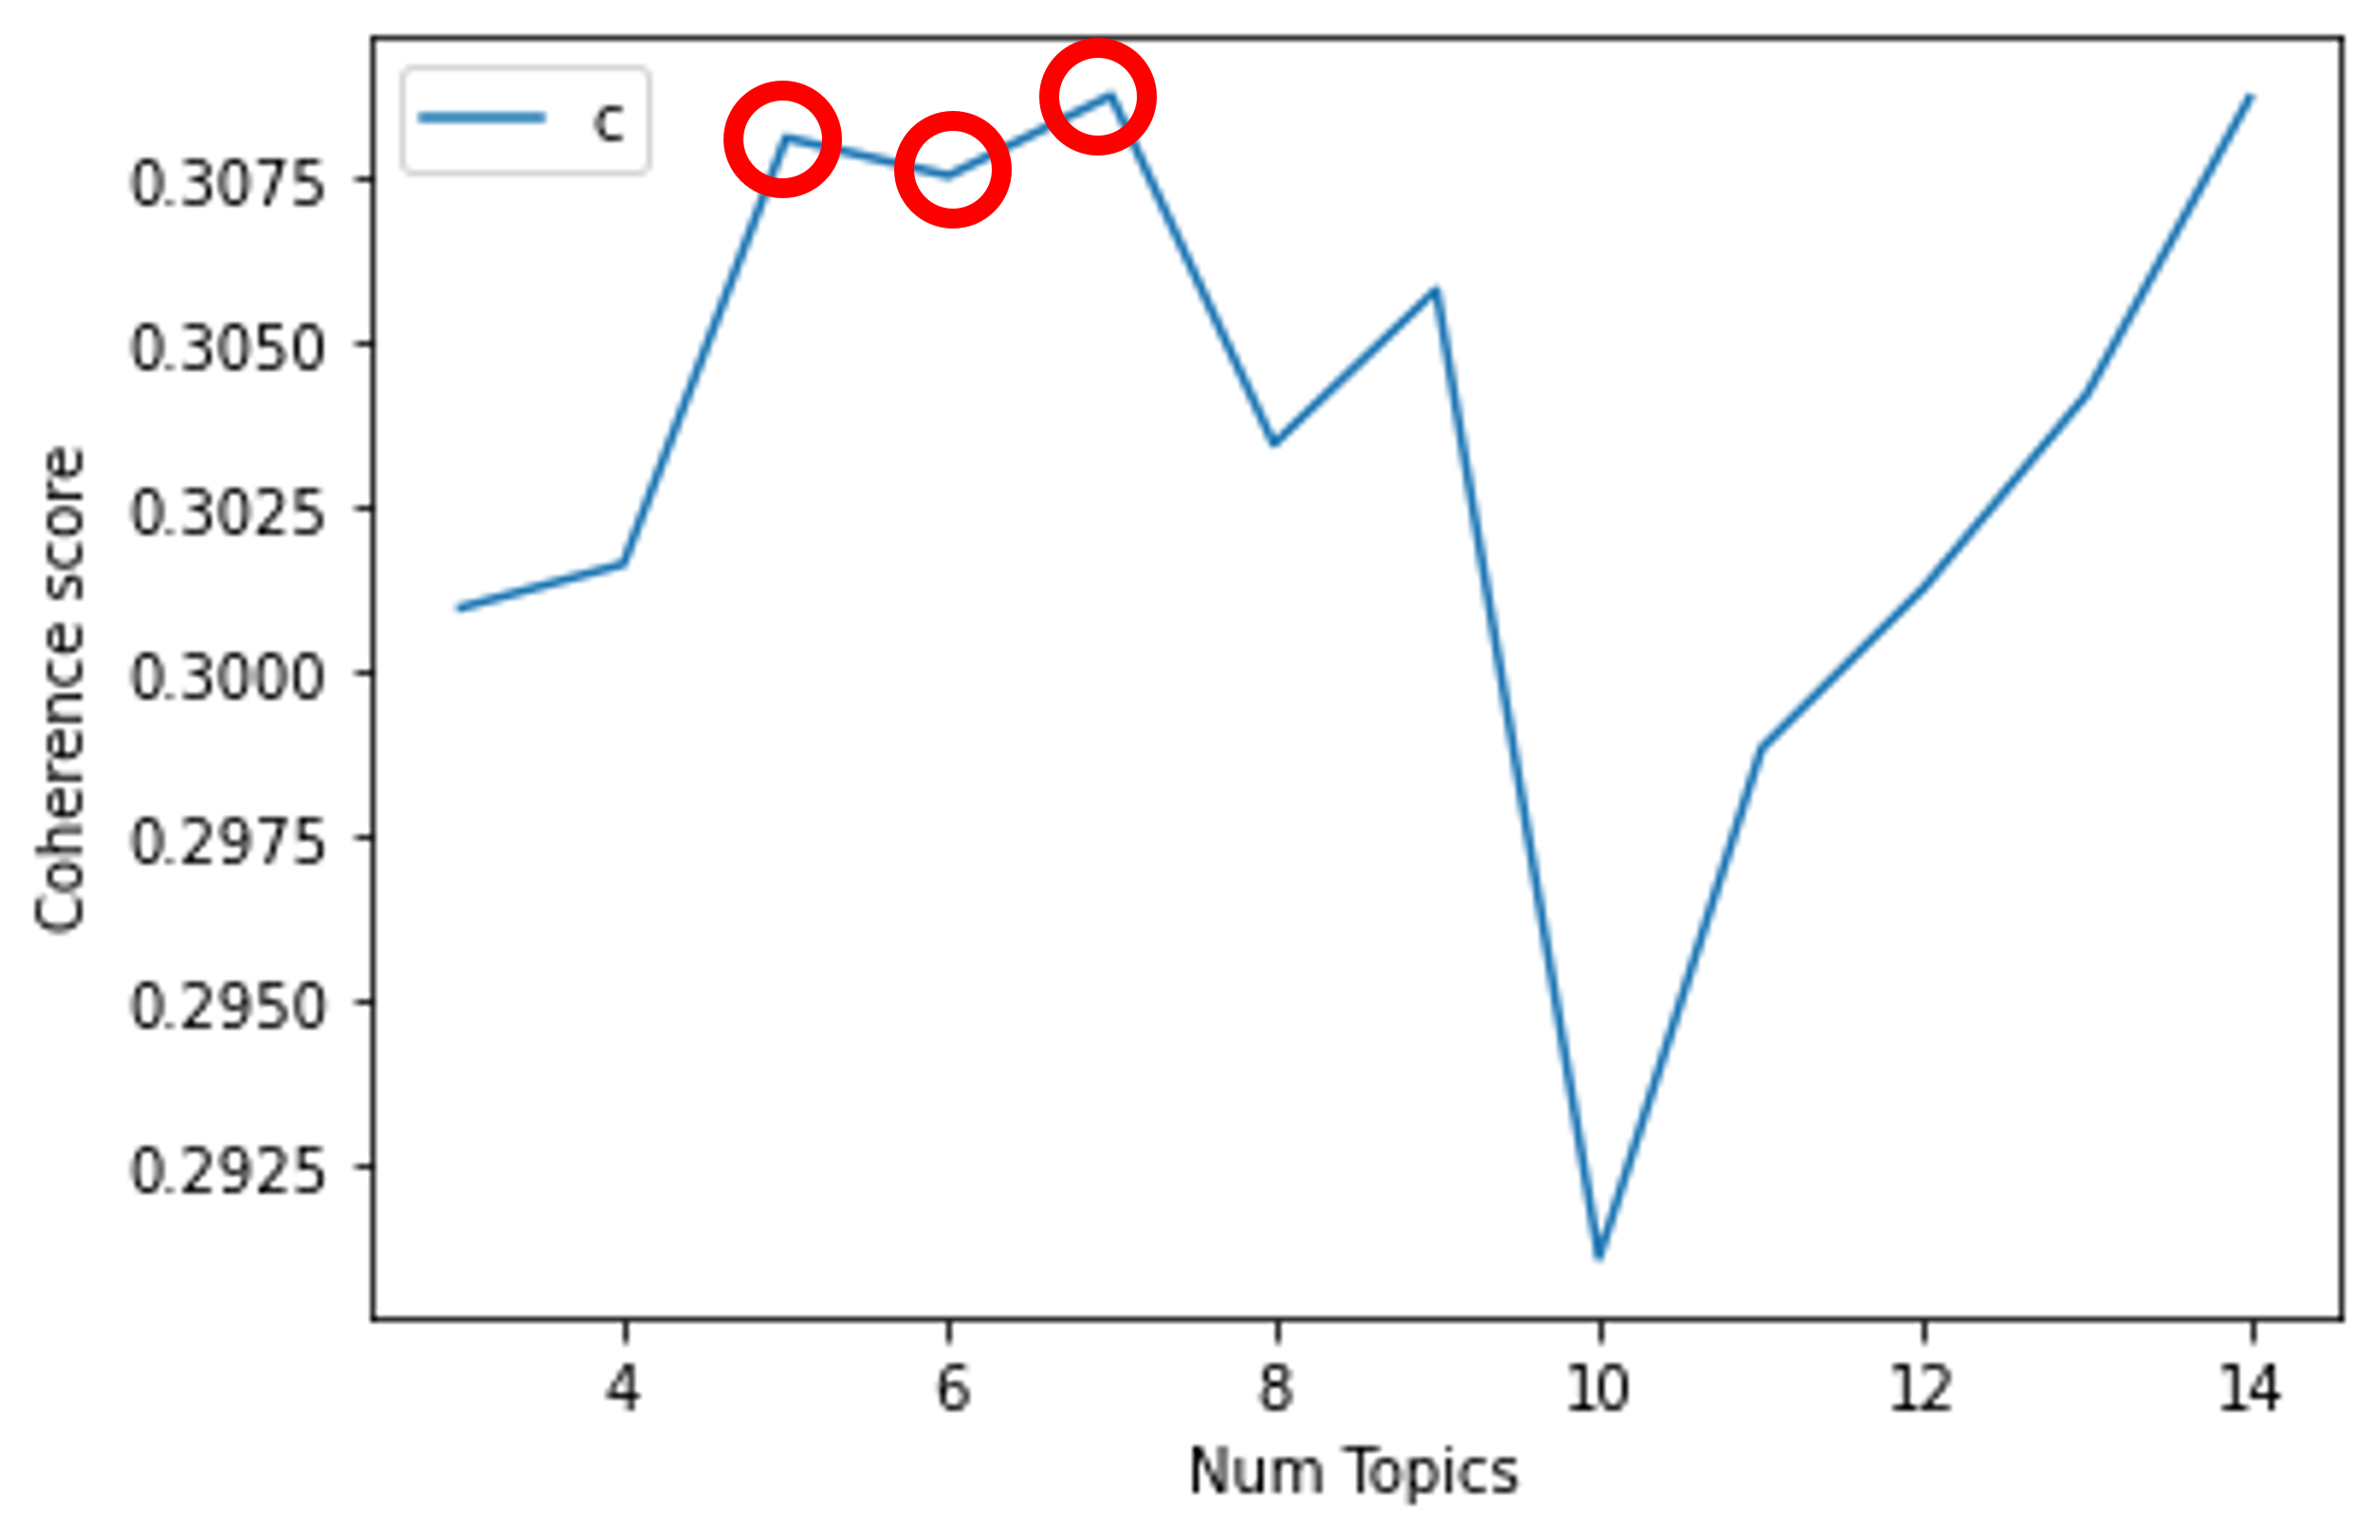
We then campare the visualizaiotn and perplexity scores of these three models. All the perplexity scores are similar to each other: perplexity (5)=-7.63

> 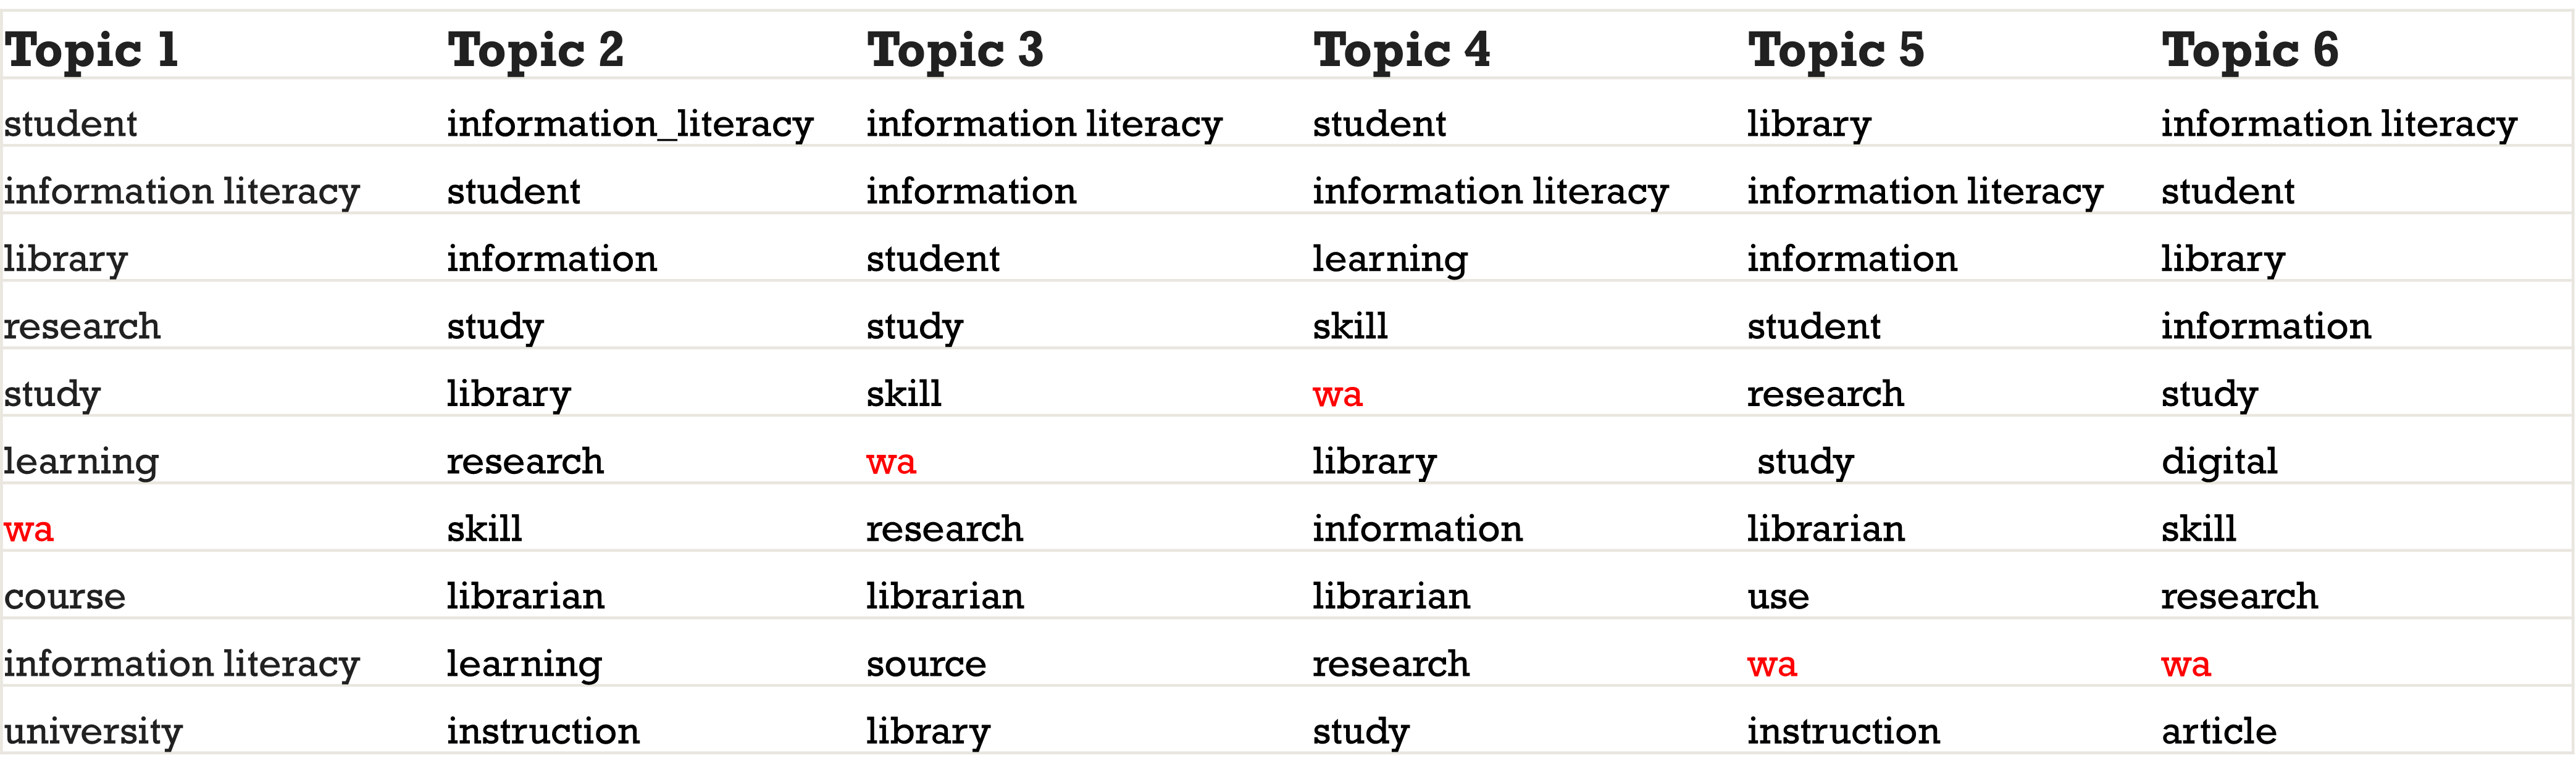 


Perplexity (6) = -7.65 and Perplexity (7) = -7.68. Visualy we can see that the model of 6 topics had less overlaps and makes more sense. The most weighted words for each topic within this model are reported in the table above. 

#### 5. Conclusion and Discussion

> Although the selected model was better than the others, it was not quite clear and still problematic. Although we removed words with low TF-IDF scores, phrases appearing frequently like information literacy were still included and existing in all topics, which did not give us too much insights. It indicates that we still need to adjust the strategy of modeling the topics. We also had some issue with a word wa. We still did not find the reason why this word was here. The current results is just prelimenary findings and we will keep working on adjusting the method of preprocessing the texts, i.e., remove more frequent words, increase the upper limit of topic numbers, etc. 
